# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 3: *BasicPointOperators*
Applies point operations to an image (sawtooth,logarithmic,exponential) and show the histogram of the resulting image
***  

### Setup modules

In [3]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageL
from PlotUtilities import plotHistogram
from ImageOperatorsUtilities import computeHistogram

# Math functions and iteration
from math import log, exp
from timeit import itertools

### Parameters:
    intevalSize = Define the sawtooth fixed interval size
    imageName = Input image name

In [4]:
imageName = "Horse.png"
intevalSize = 64

### Read and show input image

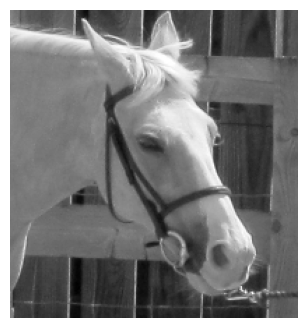

In [5]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter3/Input/")
inputImage, width, height  = imageReadL(pathToDir + imageName)
plotImageL(inputImage, figureSize = 4)

### Create 3 images to store the result of 3 operators

In [4]:
outputSawtoothImage = createImageL(width, height)
outputLogarithmicImage = createImageL(width, height)
outputExponentialImage = createImageL(width, height)

### Set the pixels in the output image

In [5]:
for x,y in itertools.product(range(0, width), range(0, height)):
    inputValue = int(inputImage[y,x])
    
    # Set the pixels in the sawtooth image
    pixelInInterval = inputValue % intevalSize
    gain = float(pixelInInterval) / float(intevalSize)
    outputSawtoothImage[y,x] = inputValue * gain 
    
    # Set the pixels in the Logarithmic
    outputLogarithmicImage[y,x] = 20 * log(inputValue * 100.0) 
    
    # Set the pixels in the Exponential image
    outputExponentialImage[y,x] = 20 * exp(inputValue / 100.0)  


### Compute histograms

In [6]:
histogramSawtoothImage = computeHistogram(outputSawtoothImage)
histogramLogarithmicImage = computeHistogram(outputLogarithmicImage)
histogramExponentialImage = computeHistogram(outputExponentialImage)       

### Show output images

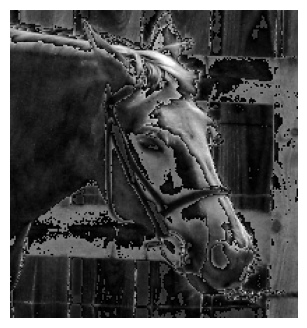

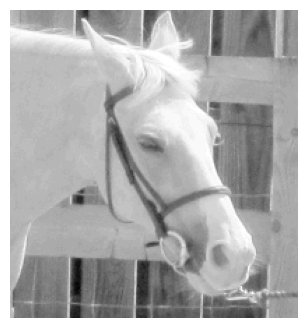

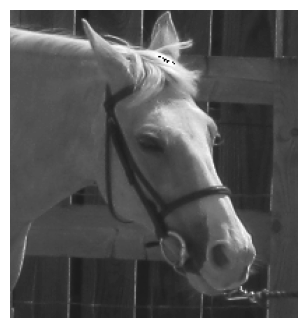

In [7]:
plotImageL(outputSawtoothImage, figureSize = 4)
plotImageL(outputLogarithmicImage, figureSize = 4)
plotImageL(outputExponentialImage, figureSize = 4)

### Plot histograms

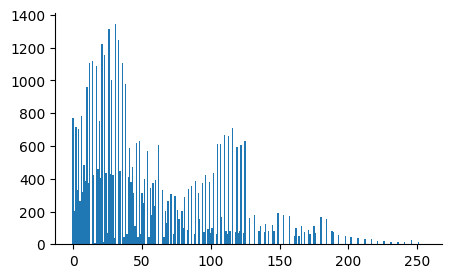

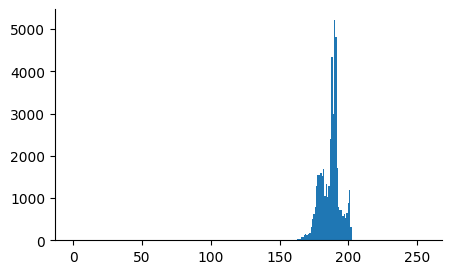

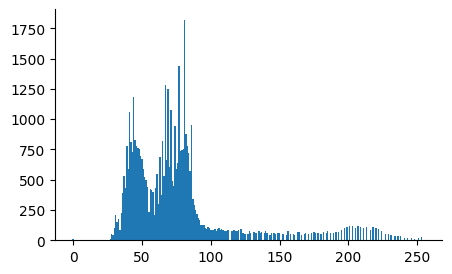

In [8]:
plotHistogram(histogramSawtoothImage)
plotHistogram(histogramLogarithmicImage)
plotHistogram(histogramExponentialImage)